In [1]:
import piplite
await piplite.install('seaborn')

In [2]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
data = pd.read_csv('mcs_ds_edited_iter_shuffled.csv' ,delimiter=',')
data.head()
#импортируем нужные модули

,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
0,30,15,200,40,0.773546,0.250555
1,15,15,100,70,0.911941,0.498329
2,30,15,100,50,0.814867,0.255546
3,15,20,100,20,1.435332,0.394603
4,30,15,100,40,1.265909,0.302943


In [5]:
pd.isnull(data).any

<bound method NDFrame._add_numeric_operations.<locals>.any of      anchor_ratio  trans_range  node_density  iterations    ale  sd_ale
0           False        False         False       False  False   False
1           False        False         False       False  False   False
2           False        False         False       False  False   False
3           False        False         False       False  False   False
4           False        False         False       False  False   False
..            ...          ...           ...         ...    ...     ...
102         False        False         False       False  False   False
103         False        False         False       False  False   False
104         False        False         False       False  False   False
105         False        False         False       False  False   False
106         False        False         False       False  False   False

[107 rows x 6 columns]>

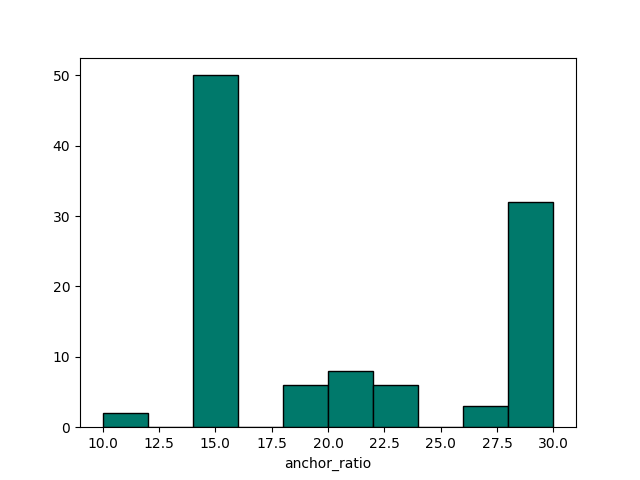

In [6]:
plt.figure()
plt.hist(data['anchor_ratio'], ec='black', color='#00796b')
plt.xlabel('anchor_ratio')
plt.ylabel('')
plt.show()

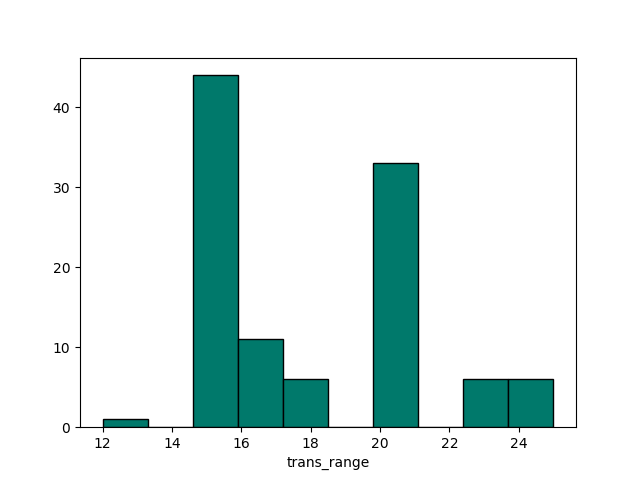

In [7]:
plt.figure()
plt.hist(data['trans_range'], ec='black', color='#00796b')
plt.xlabel('trans_range')
plt.ylabel('')
plt.show()

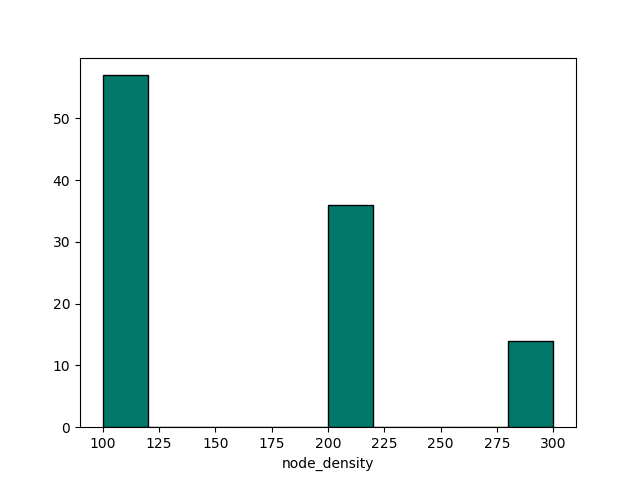

In [9]:
plt.figure()
plt.hist(data['node_density'], ec='black', color='#00796b')
plt.xlabel('node_density')
plt.ylabel('')
plt.show()

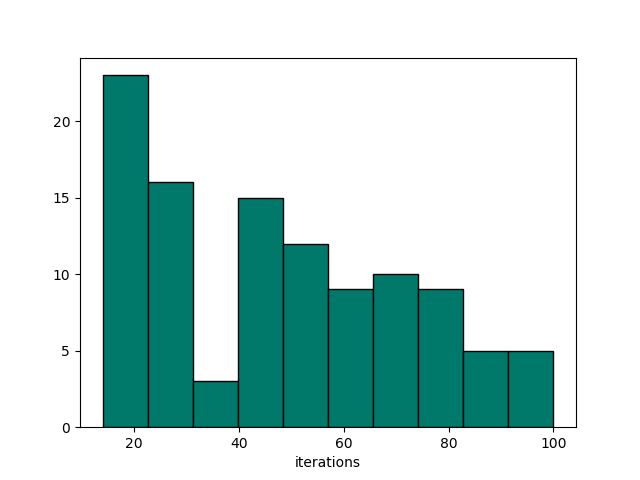

In [10]:
plt.figure()
plt.hist(data['iterations'], ec='black', color='#00796b')
plt.xlabel('iterations')
plt.ylabel('')
plt.show()

In [11]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.]])

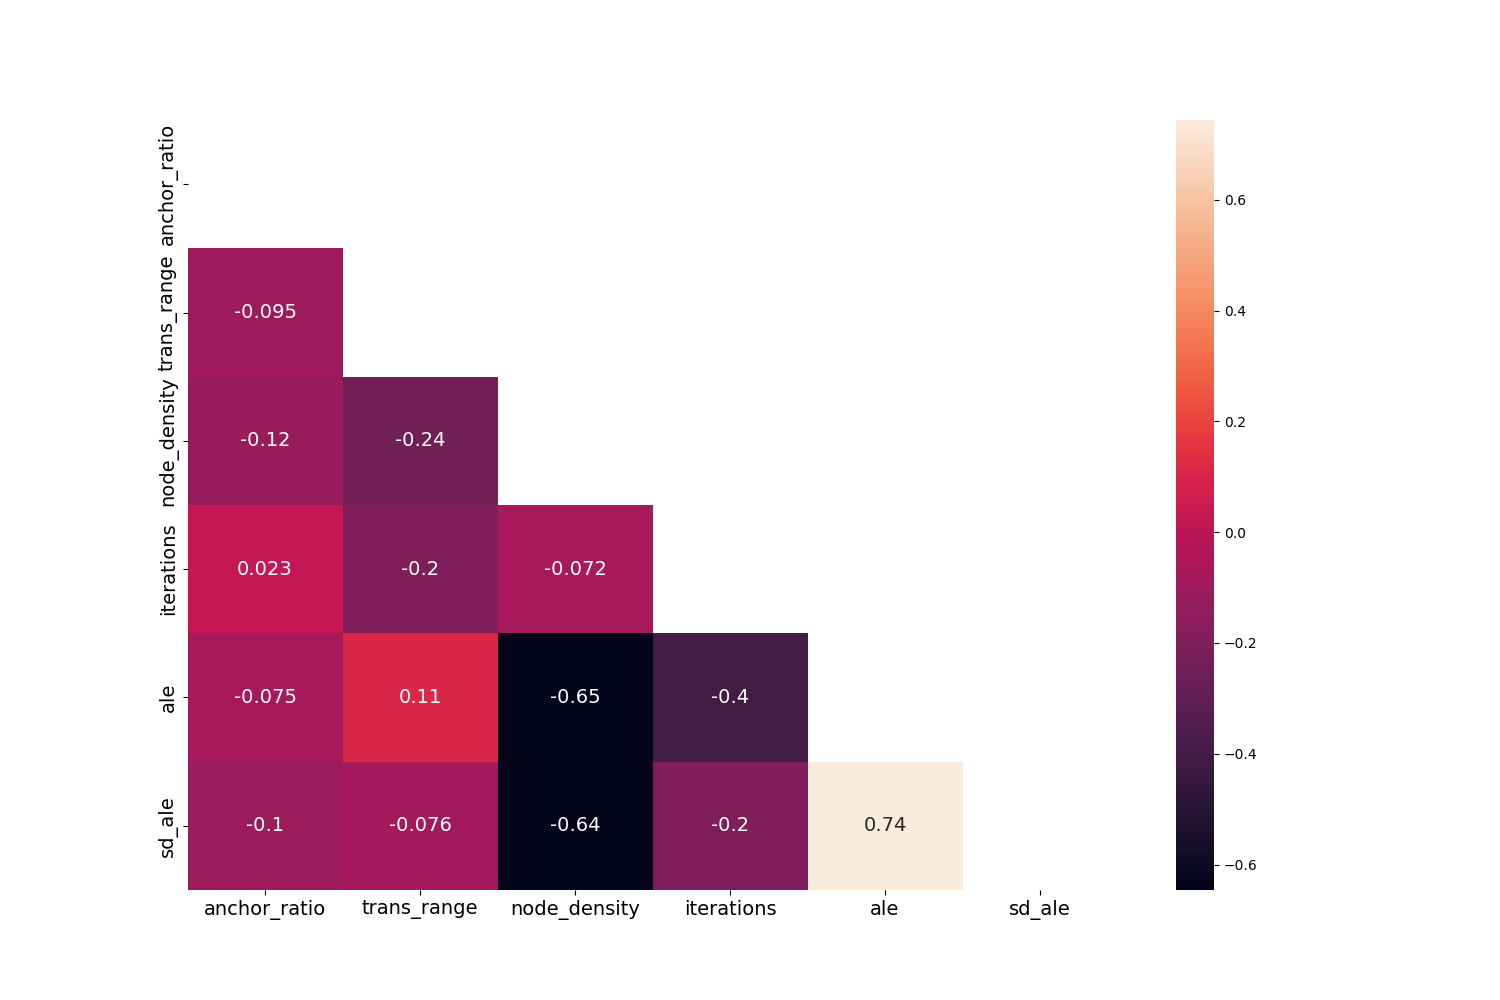

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={'size': 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [13]:
x=np.array(data['anchor_ratio']).reshape((-1,1))
y=np.array(data['ale'])
model=LinearRegression().fit(x,y)
print(f'Коэффициент детерминации:{model.score(x,y)}')
print(f'Интерцепт:{model.intercept_}')
print(f'Коэффициент:{model.coef_[0]}')


Коэффициент детерминации:0.0056246135668754915
Интерцепт:1.0767225632713422
Коэффициент:-0.004543690738630977


In [14]:
x=np.array(data['trans_range']).reshape((-1,1))
y=np.array(data['ale'])
model=LinearRegression().fit(x,y)
print(f'Коэффициент детерминации:{model.score(x,y)}')
print(f'Интерцепт:{model.intercept_}')
print(f'Коэффициент:{model.coef_[0]}')

Коэффициент детерминации:0.011948396959491459
Интерцепт:0.7266644855844975
Коэффициент:0.01436396730290578


In [15]:
x=np.array(data['node_density']).reshape((-1,1))
y=np.array(data['ale'])
model=LinearRegression().fit(x,y)
print(f'Коэффициент детерминации:{model.score(x,y)}')
print(f'Интерцепт:{model.intercept_}')
print(f'Коэффициент:{model.coef_[0]}')

Коэффициент детерминации:0.4172217579204366
Интерцепт:1.57554471677975
Коэффициент:-0.0037047903676861557


In [16]:
x=np.array(data['iterations']).reshape((-1,1))
y=np.array(data['ale'])
model=LinearRegression().fit(x,y)
print(f'Коэффициент детерминации:{model.score(x,y)}')
print(f'Интерцепт:{model.intercept_}')
print(f'Коэффициент:{model.coef_[0]}')

Коэффициент детерминации:0.16031556573386607
Интерцепт:1.3008346874270955
Коэффициент:-0.00662723304970711


In [5]:
x = data['ale']
y = data.drop('ale', axis=1)

X_train, X_test, y_train, y_test = train_test_split(y, x, test_size=0.314, random_state=10)

model = LinearRegression().fit(X_train, y_train)

print(f'Коэффиценты: {model.coef_}')
print(f'Итоговый интерцент: {model.intercept_}')

<class 'NameError'>: name 'data' is not defined